# Results Evaluation

In [1]:
%run ../scripts/load_df_for_analysis.py
%run ../scripts/data_visualisations.py
%run ../scripts/df_calculations.py
%run ../scripts/significance_tests.py

In [2]:
n_permutations = 1000

## Overall model results

In [3]:
import json

with open('../data/all_results.json', 'r') as f:
    all_results = json.load(f)

In [4]:
def get_best_model_configurations(all_results):
    best_configs = {}
    
    for model_name, configurations in all_results.items():
        best_config = None
        best_balanced_accuracy = -1
        best_config_name = None
        
        for config_name, config_data in configurations.items():
            # Skip configurations ending with "AI_prompt"
            if config_name.endswith('AI_prompt'):
                continue
                
            # Only consider 'all' results
            if 'all' in config_data:
                balanced_accuracy = config_data['all'].get('Balanced Accuracy', -1)
                if balanced_accuracy > best_balanced_accuracy:
                    best_balanced_accuracy = balanced_accuracy
                    best_config = config_data['all']
                    best_config_name = config_name
        
        if best_config is not None:
            best_configs[model_name] = {
                'configuration': best_config_name,
                'balanced_accuracy': best_balanced_accuracy,
                'results': best_config
            }
    
    return best_configs

In [5]:
best_model_configs = get_best_model_configurations(all_results)

print("Best model configurations based on highest Balanced Accuracy (excluding 'AI_prompt'):\n")
for model, data in best_model_configs.items():
    print(f"{model}: {data['configuration']} (Balanced Accuracy: {data['balanced_accuracy']:.3f})")

Best model configurations based on highest Balanced Accuracy (excluding 'AI_prompt'):

gpt-3.5-turbo-0125: only_text_256_20 (Balanced Accuracy: 0.764)
gpt-4.1-nano-2025-04-14: 256_20 (Balanced Accuracy: 0.774)
gpt-4.1-mini-2025-04-14: only_text_1024_20 (Balanced Accuracy: 0.833)
gpt-4.1-2025-04-14: only_text_1024_20 (Balanced Accuracy: 0.856)
llama3.1.70b: only_text_1024_20 (Balanced Accuracy: 0.819)
llama4.scout: only_text_256_20 (Balanced Accuracy: 0.791)


In [6]:
model_names = {
 'gpt-3.5-turbo-0125': 'GPT-3.5 Turbo',
 'gpt-4.1-nano-2025-04-14': 'GPT-4.1 nano',
 'gpt-4.1-mini-2025-04-14': 'GPT-4.1 mini',
 'gpt-4.1-2025-04-14': 'GPT-4.1',
 'llama3.1.70b': 'Llama 3.1 70B',
 'llama4.scout': 'Llama 4 Scout'
 }

Balanced Accuracies and F1-Scores for Label "Unsubstantiated"\nof Best Parameter Configuration for Each Model

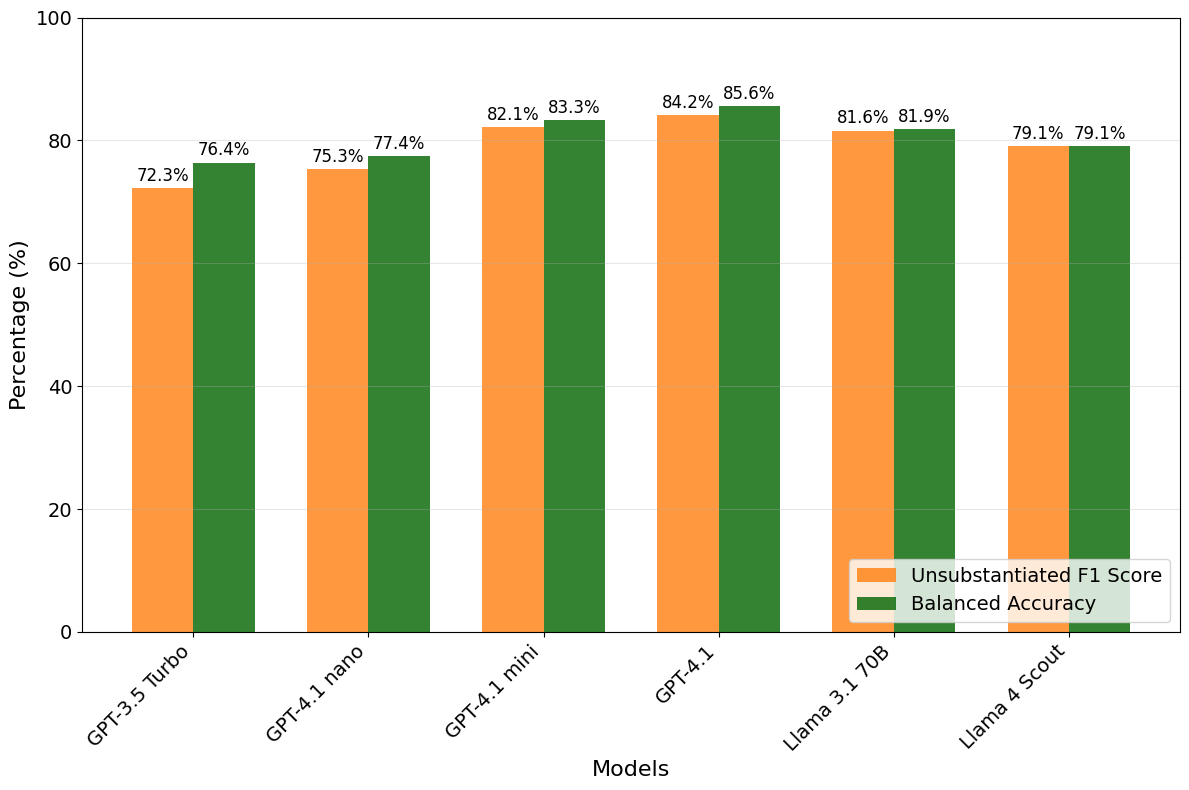

In [7]:
show_best_models_comparison(best_model_configs, model_names=model_names, title='', save_title="best_models_results")

### Comparison of best GPT and best Llama Model (from tested models on this data): <br>GPT 4.1 vs. Llama 3.1:70b

In [8]:
chunking = "1024_20"
only_text = True
model = "gpt-4.1-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt = eval_predictions(df_gpt, include_relabelled_partially=True)
results_gpt_no_partially = eval_predictions(df_gpt, include_relabelled_partially=False)

In [9]:
chunking = "256_20"
only_text = True
model = "llama3.1.70b"
df_llama = load_df_for_analysis(chunking, only_text, model)
results_llama = eval_predictions(df_llama, include_relabelled_partially=True)
results_llama_no_partially = eval_predictions(df_llama, include_relabelled_partially=False)

In [10]:
model_results = {
    "GPT-4.1\n(1024 Token Chunks, with PBTE)": results_gpt,
    "Llama 3.1 70B\n(256 Token Chunks, with PBTE)": results_llama,
}

display_model_results_table(model_results)

,Accuracy,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,,
"GPT-4.1\n(1024 Token Chunks, with PBTE)",0.858,0.856,0.877,0.809,0.842,0.844,0.902,0.872
"Llama 3.1 70B\n(256 Token Chunks, with PBTE)",0.806,0.810,0.748,0.878,0.808,0.875,0.742,0.803


Comparison of Classification Performance Metrics per Label\nbetween GPT 4.1 and Llama 3.1:70b\non Full Dataset

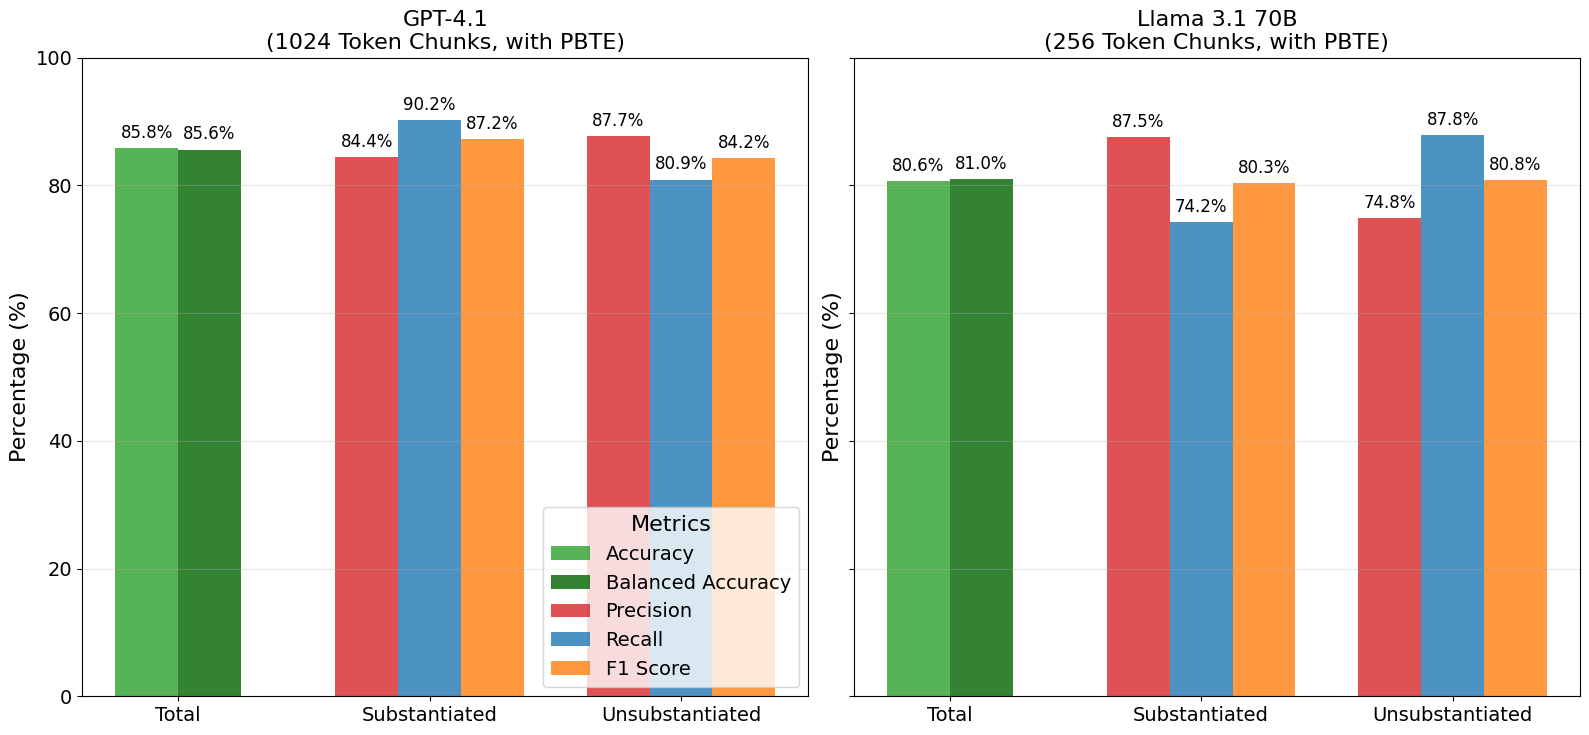

In [11]:
show_metrics_per_label(model_results, "", save_title="detailed_metrics_best_llama_gpt_models")

#### Other models

In [12]:
# Llama 4 Scout
chunking = "256_20"
only_text = True
model = "llama4.scout"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_llama_4_scout = eval_predictions(df_gpt, include_relabelled_partially=True)

Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Using extracted label (Substantiated) from non JSON text!
Using extracted label (Substantiated) from non JSON text!
Using extracted label (Unsubstantiated) from non JSON text!
Row 136 Model Classification could not be decoded: Expecting value: line 1 column 1 (char 0)
The information you provided is not sufficient for me to provide a detailed response. Please provide more context or information about your topic of interest.
Row 137 Model Classification could not be decoded: Expecting value: line 1 column 1 (char 0)
# Substantiated

The reference article provides a detailed 

In [13]:
# GPT-3.5 Turbo
chunking = "256_20"
only_text = True
model = "gpt-3.5-turbo-0125"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt_35_turbo = eval_predictions(df_gpt, include_relabelled_partially=True)

Row 21 Model Classification could not be decoded: Expecting value: line 1 column 1 (char 0)

Row 21 Model Classification Label is not a valid label: None


In [14]:
# GPT-4.1 nano
chunking = "256_20"
only_text = False
model = "gpt-4.1-nano-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt_41_nano = eval_predictions(df_gpt, include_relabelled_partially=True)

In [15]:
# GPT-4.1 mini
chunking = "1024_20"
only_text = True
model = "gpt-4.1-mini-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt_41_mini = eval_predictions(df_gpt, include_relabelled_partially=True)

In [18]:
other_model_results = {
    "GPT-3.5 Turbo\n(256 Token Chunks, with PBTE)": results_gpt_35_turbo,
    "GPT-4.1 nano\n(256 Token Chunks, no PBTE)": results_gpt_41_nano,
    "GPT-4.1 mini\n(1024 Token Chunks, with PBTE)": results_gpt_41_mini,
    "GPT-4.1\n(1024 Token Chunks, with PBTE)": results_gpt,
    "Llama 3.1 70B\n(256 Token Chunks, with PBTE)": results_llama,
    "Llama 4 Scout\n(256 Token Chunks, with PBTE)": results_llama_4_scout,
}

display_model_results_table(other_model_results)

,Accuracy,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,,
"GPT-3.5 Turbo\n(256 Token Chunks, with PBTE)",0.773,0.764,0.839,0.635,0.723,0.738,0.894,0.809
"GPT-4.1 nano\n(256 Token Chunks, no PBTE)",0.777,0.774,0.778,0.730,0.753,0.777,0.818,0.797
"GPT-4.1 mini\n(1024 Token Chunks, with PBTE)",0.834,0.833,0.825,0.817,0.821,0.842,0.848,0.845
"GPT-4.1\n(1024 Token Chunks, with PBTE)",0.858,0.856,0.877,0.809,0.842,0.844,0.902,0.872
"Llama 3.1 70B\n(256 Token Chunks, with PBTE)",0.806,0.810,0.748,0.878,0.808,0.875,0.742,0.803
"Llama 4 Scout\n(256 Token Chunks, with PBTE)",0.785,0.791,0.725,0.870,0.791,0.862,0.712,0.780


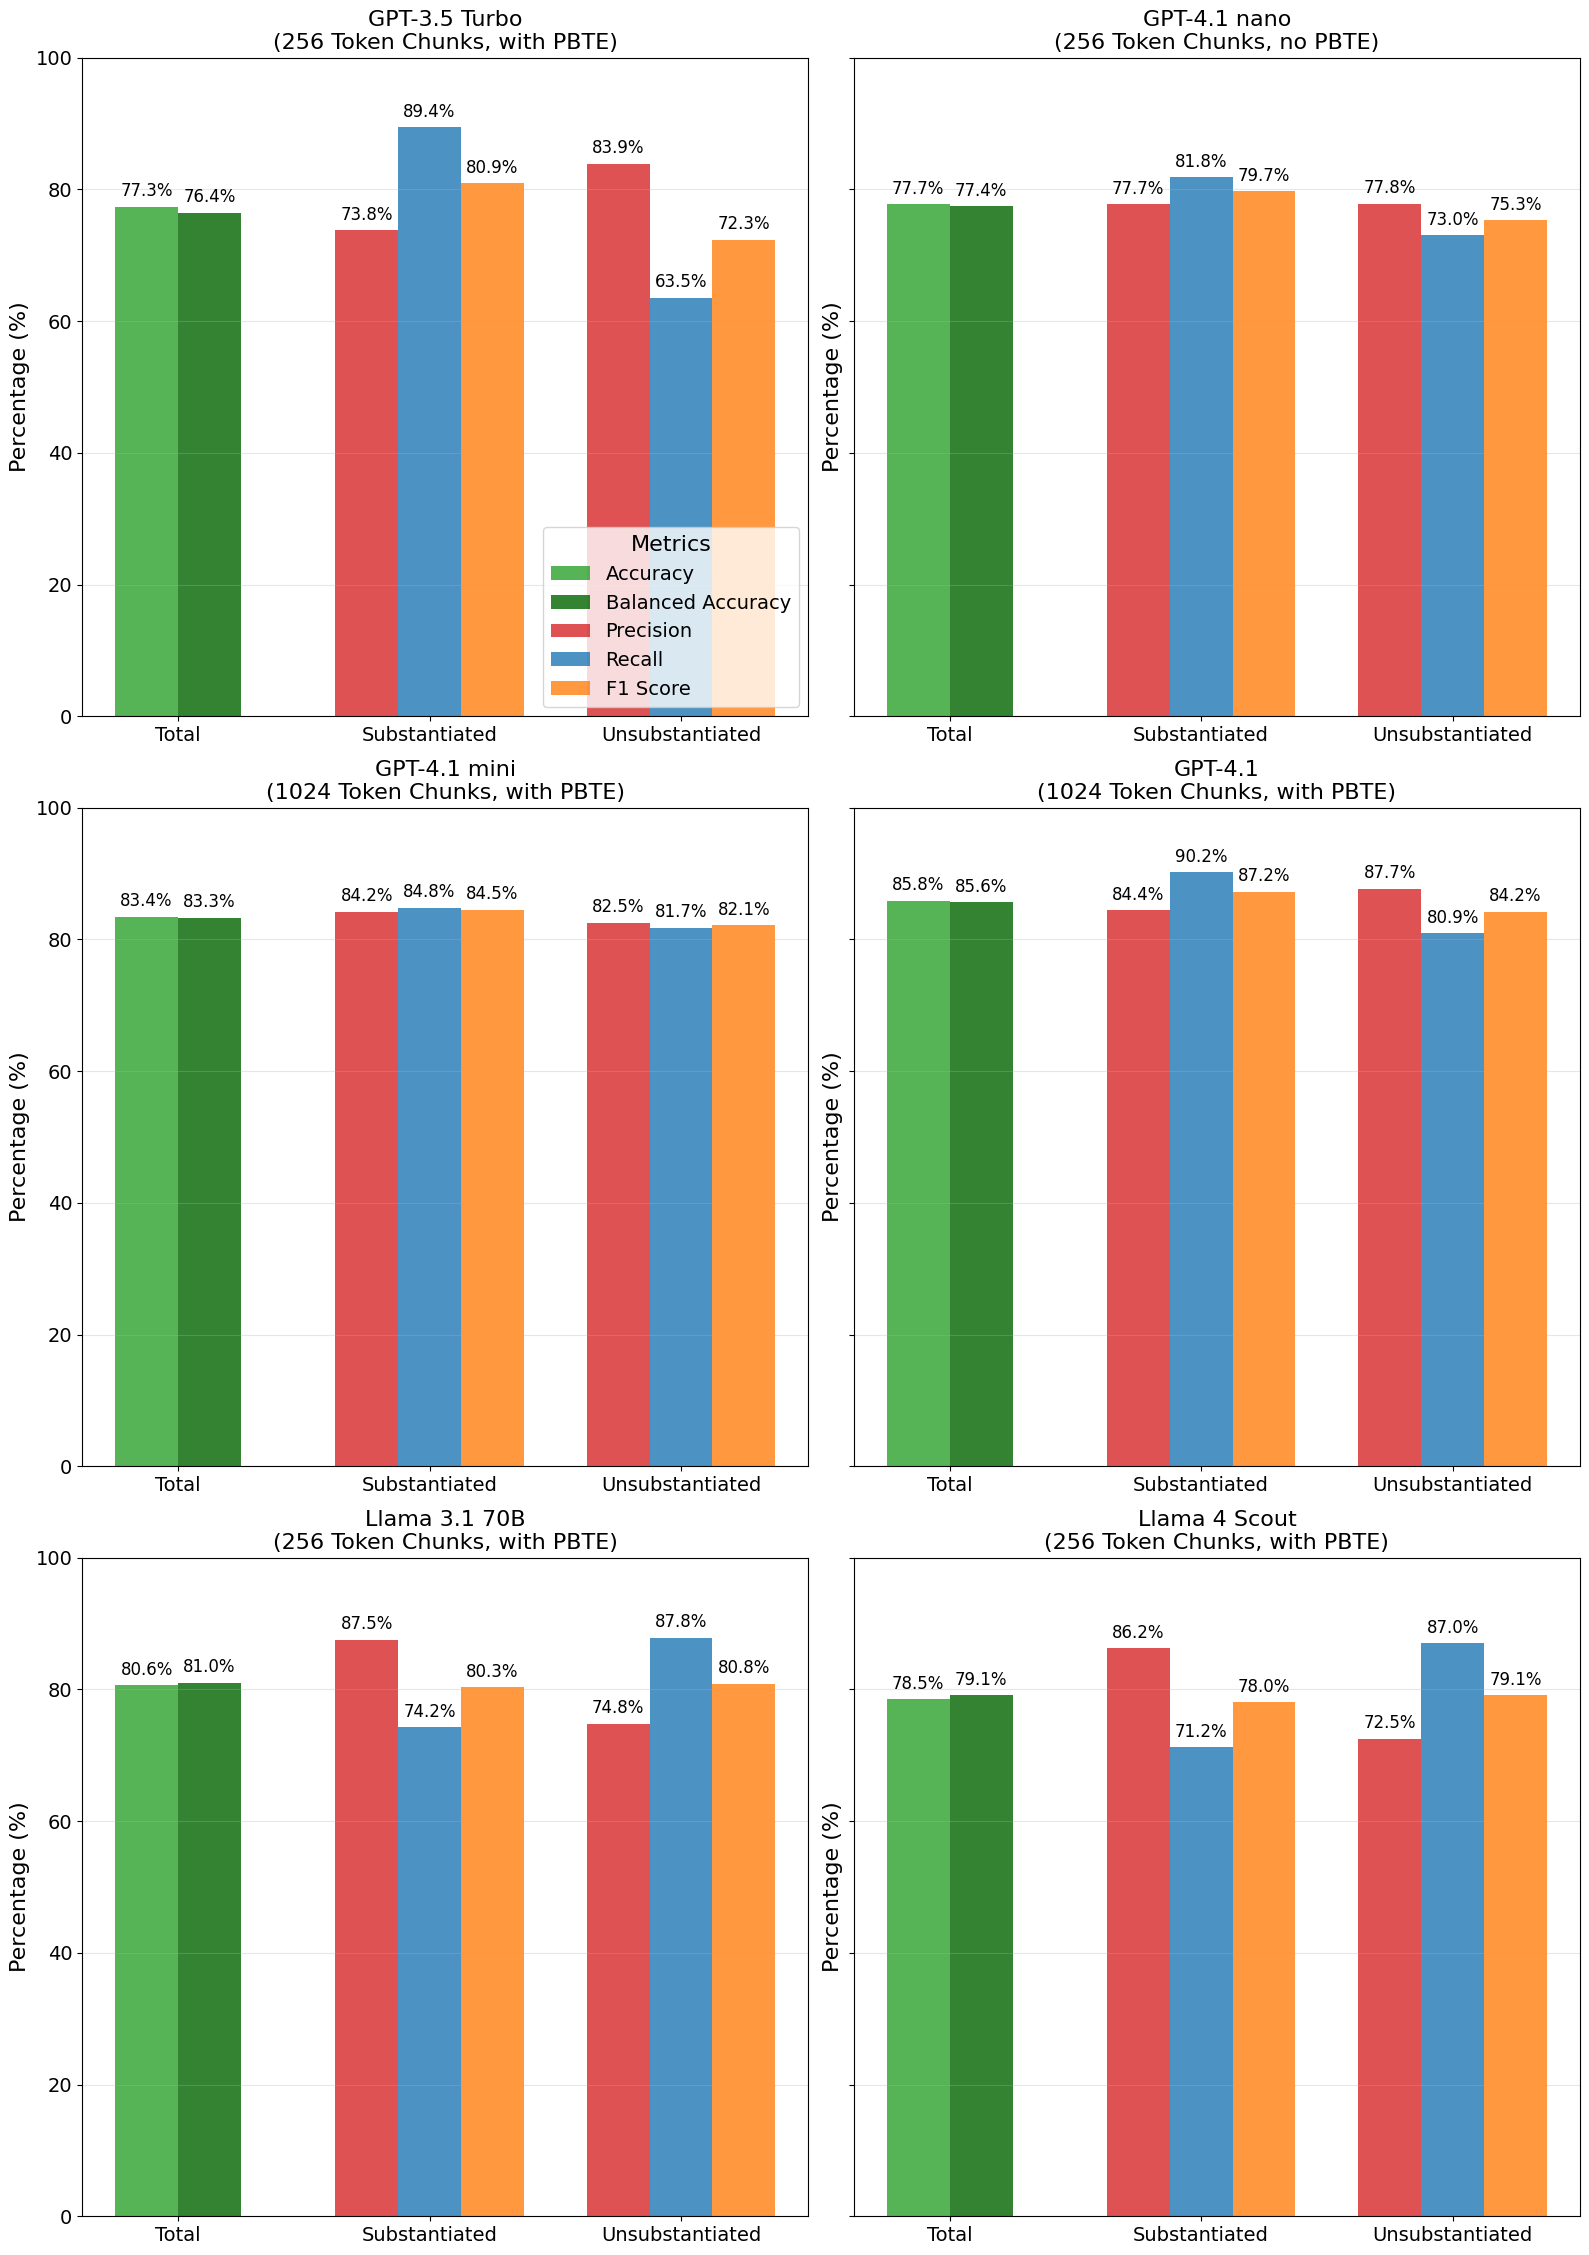

In [19]:
show_metrics_per_label(other_model_results, "", save_title="detailed_metrics_other_llama_gpt_models")

## Comparison: Evaluation per Annotation Attribute

In [7]:
def attribute_predictions_per_model(model_dfs, attribute, relabelled_partially=False, group_numbers_from=False):
    results = {}
    for model_name, df in model_dfs.items():
        results[model_name] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=True, group_numbers_from=group_numbers_from)
        if relabelled_partially:
            results[model_name + " (exclude relabelled partially)"] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=False, group_numbers_from=group_numbers_from)
    return results

In [8]:
def fisher_exact_for_attribute(df, attribute, group_numbers_from=False):
    results = {}
    attribute_groups = get_attribute_value_groups(df, attribute, group_numbers_from)
    for group_name, attribute_values_list in attribute_groups:
        results[group_name] = calc_fisher_exact_total_sub_unsub(
            eval_attribute_subset_vs_rest(df, attribute, attribute_values_list)
        )
    display_fishers_exact_test_results(results)
    return results

In [9]:
def chi_squared_for_attribute(df, attribute, group_numbers_from=False):
    attribute_groups = get_attribute_value_groups(df, attribute, group_numbers_from)
    evals = eval_per_attribute_value(df, attribute, attribute_groups)
    results = calc_chi_squared_total_sub_unsub(evals, [group_name for group_name, _ in attribute_groups])
    display_chi_squared_test_results(results)
    return results

In [10]:
def permutation_test_for_attribute(df, attribute, group_numbers_from, n_permutations):
    results = calc_permutation_test_total_sub_unsub(df, attribute, group_numbers_from, n_permutations)
    display_permutation_test_results(results)
    return results

In [11]:
def significance_tests_for_attribute(df, model_name, attribute, group_numbers_from=False):
    global n_permutations
    
    results = {}
    print(f"---- ## Significance tests results for {model_name} on attribute '{attribute}': ## ----")
    # Fishers exact test
    print(f"Fisher's exact test results (per attribute value when compared to rest):")
    fisher_exact_results = fisher_exact_for_attribute(df, attribute, group_numbers_from)
    results['Fisher Exact'] = fisher_exact_results

    # Chi-Squared test
    print(f"Chi-squared test results (comparison over all attribute values):")
    chi_squared_results = chi_squared_for_attribute(df, attribute, group_numbers_from)
    results['Chi-Squared'] = chi_squared_results

    # Permutation test
    print(f"Permutation test results (comparison per metric over {n_permutations} permutations):")
    permutation_test_results = permutation_test_for_attribute(df, attribute, group_numbers_from, n_permutations)
    results['Permutation Test'] = permutation_test_results

    print("\n\n")
    return results

In [12]:
model_dfs = {  
    "GPT-4.1": df_gpt
}
analyzed_df = df_gpt
analyzed_model = "GPT-4.1"
significance_tests_results = {}

### Reference Only

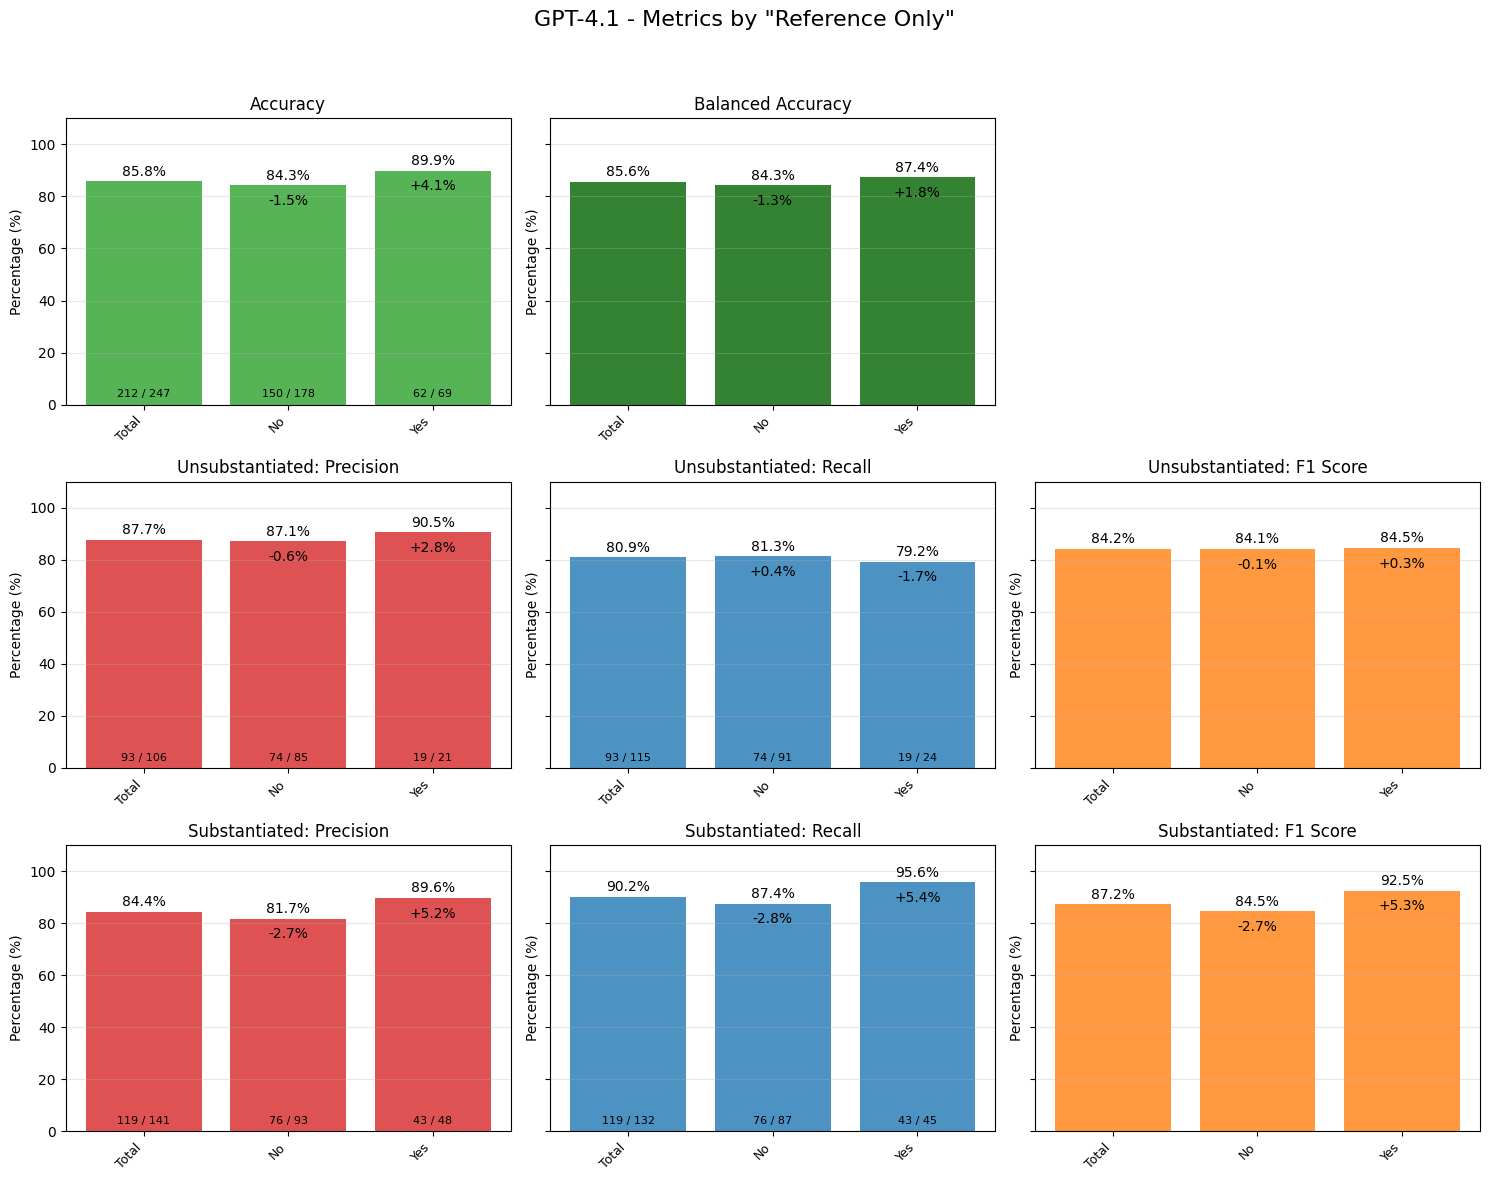

In [13]:
attribute = "Reference Only"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [14]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Reference Only': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Yes,1.6533,0.3129,0.8730,0.7769,3.1118,0.2172
No,0.6048,0.3129,1.1455,0.7769,0.3214,0.2172


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,1.3136,0.2517,0.0165,0.8978,0.6967,0.4039


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,0.000000,0.3040,N/A,N/A,N/A,N/A
Accuracy,0.000500,0.1760,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.001100,0.7990,0.001500,0.1370
Recall,N/A,N/A,-0.001200,0.6430,0.000100,0.2720
F1 Score,N/A,N/A,-0.000600,0.6100,0.001100,0.0790


### Claim Contains Number or Formula

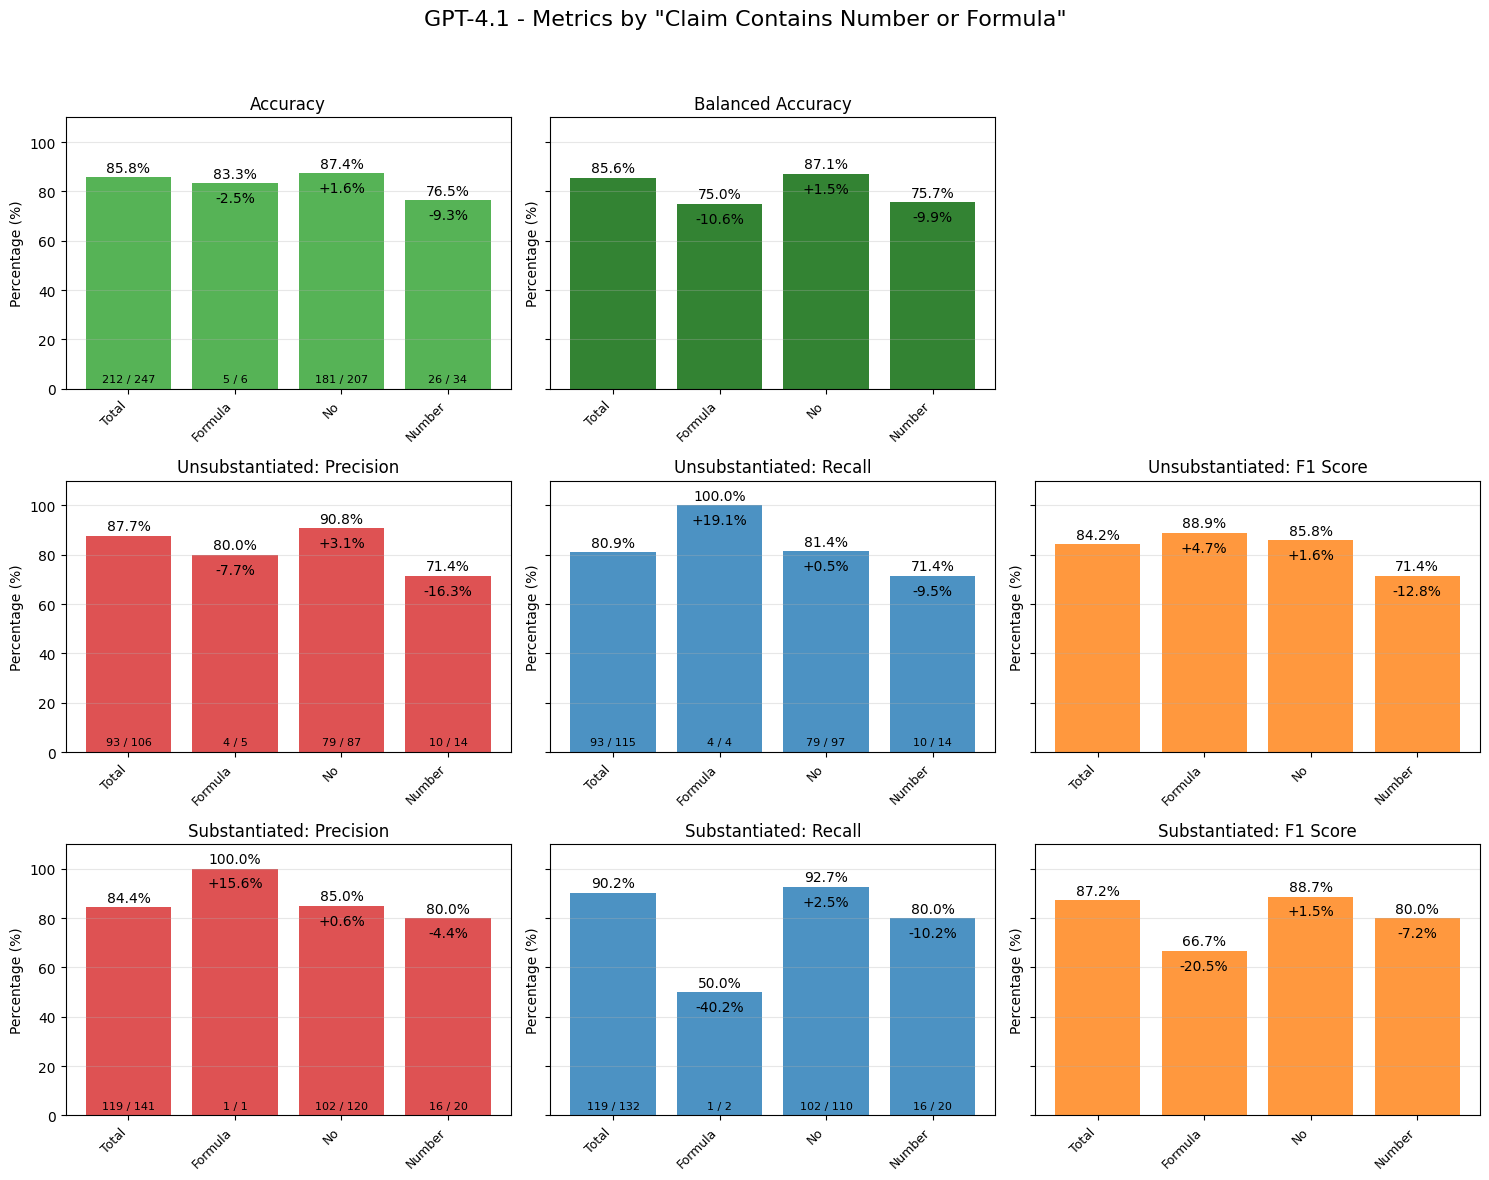

In [15]:
attribute = "Claim Contains Number or Formula"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [16]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model,attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Claim Contains Number or Formula': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
No,2.0211,0.1337,1.2540,0.7467,3.7500,0.0421
Number,0.4718,0.1107,0.5422,0.4659,0.3495,0.1105
Formula,0.8213,1.0000,inf,1.0000,0.1017,0.1879


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.8352,0.6586,0.8448,0.6555,6.2995,0.0429


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.005300,0.7290,N/A,N/A,N/A,N/A
Accuracy,-0.004700,0.8810,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.016800,0.4140,-0.007700,0.7950
Recall,N/A,N/A,-0.015900,0.5610,0.025300,0.0580
F1 Score,N/A,N/A,-0.017000,0.7920,0.002200,0.1360


### Amount Citations in Sentence

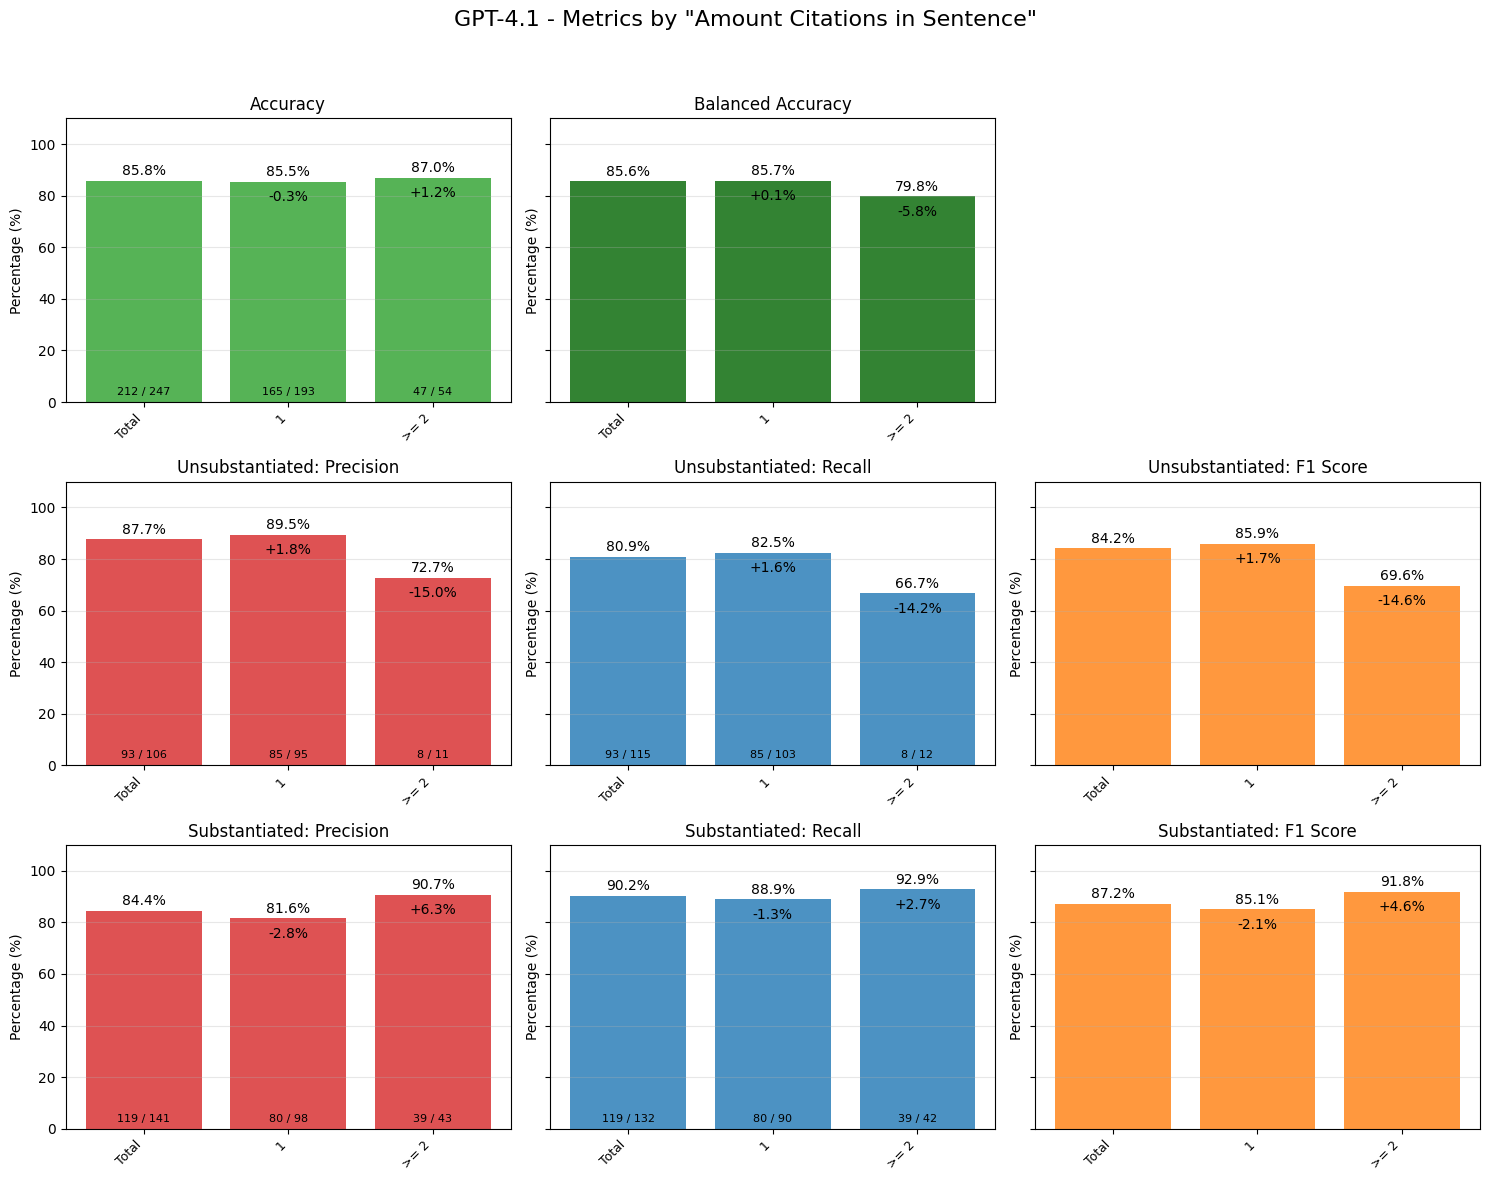

In [17]:
attribute = "Amount Citations in Sentence"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=2)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [18]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=2)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount Citations in Sentence': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.8777,1.0000,2.3611,0.2396,0.6154,0.5499
>= 2,1.1394,1.0000,0.4235,0.2396,1.6250,0.5499


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.5233,0.4694,0.0000,1.0000,0.0029,0.9574


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.000600,0.6470,N/A,N/A,N/A,N/A
Accuracy,0.000000,0.3460,N/A,N/A,N/A,N/A
Precision,N/A,N/A,0.013500,0.0030,0.004800,0.0300
Recall,N/A,N/A,-0.001700,0.7620,-0.000900,0.8030
F1 Score,N/A,N/A,0.002500,0.0530,0.001400,0.0560


### Amount References for Claim

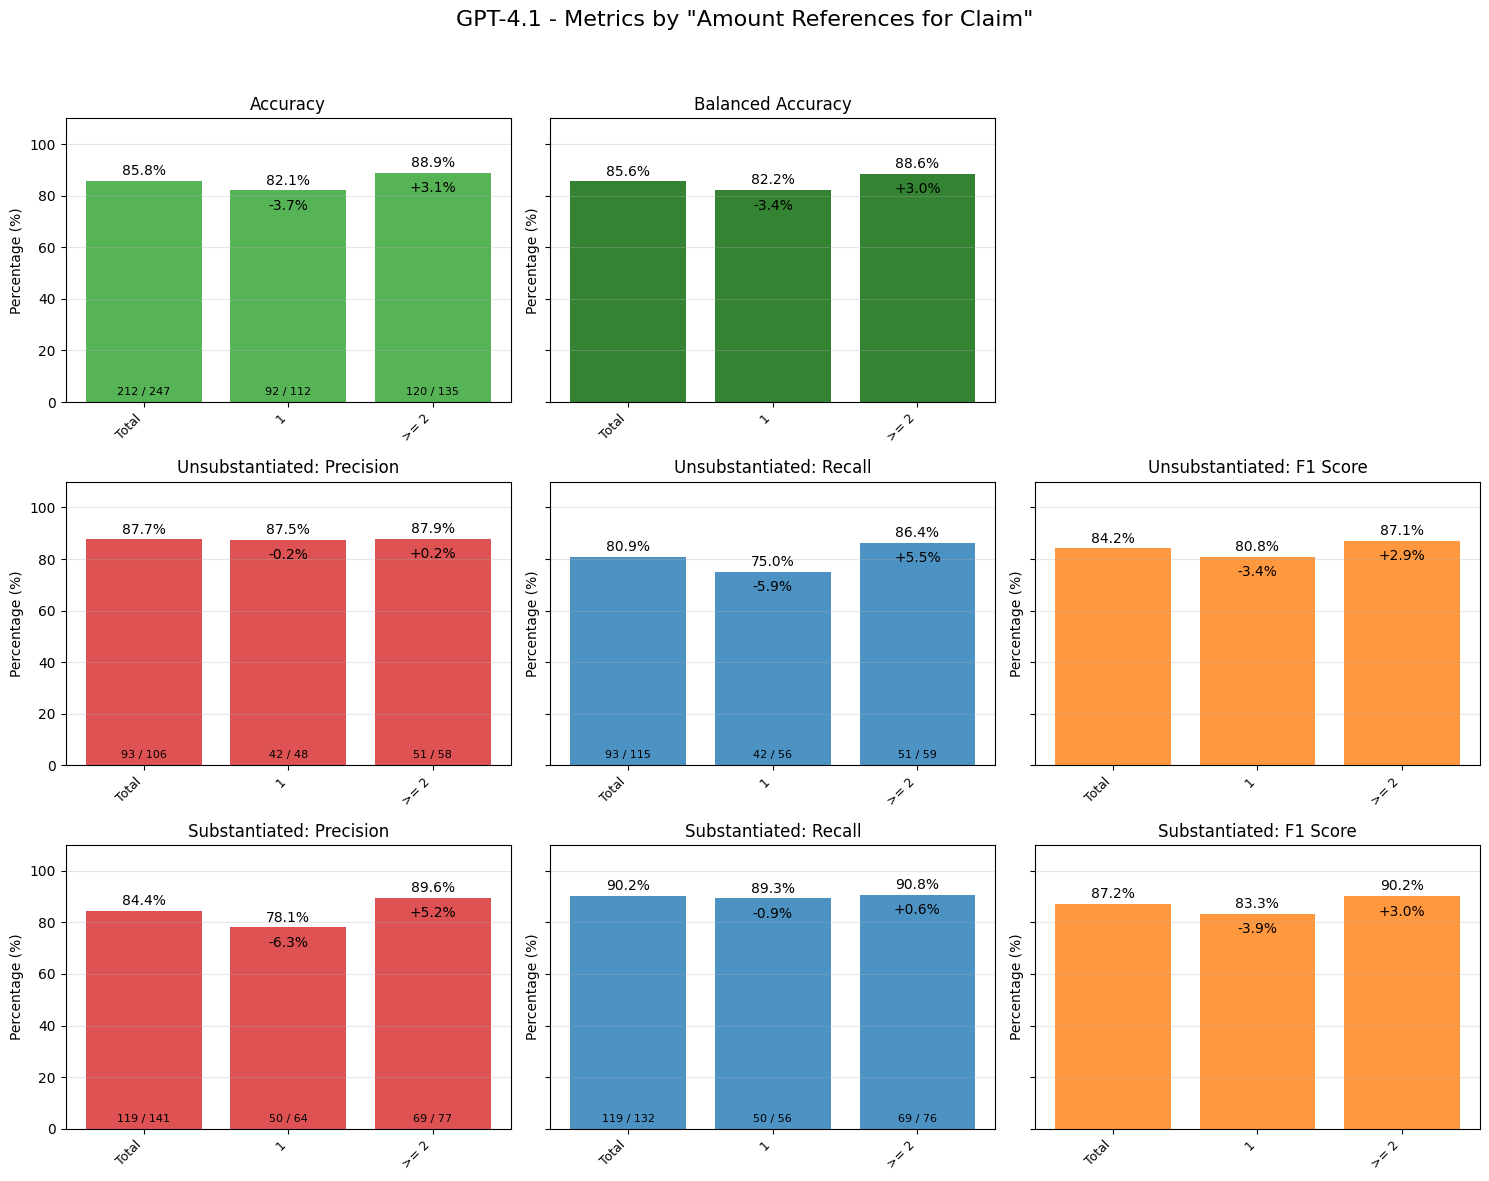

In [19]:
attribute = "Amount References for Claim"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=2)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [20]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=2)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount References for Claim': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.5750,0.1453,0.4706,0.1558,0.8454,0.7764
>= 2,1.7391,0.1453,2.1250,0.1558,1.1829,0.7764


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.4508,0.5019,0.9876,0.3203,0.0006,0.9797


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.000200,0.4310,N/A,N/A,N/A,N/A
Accuracy,-0.000100,0.3990,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.000700,0.6420,0.001200,0.1560
Recall,N/A,N/A,0.000600,0.2340,-0.000600,0.7450
F1 Score,N/A,N/A,-0.000400,0.5660,-0.000100,0.3680


### Claim Sentence Structure

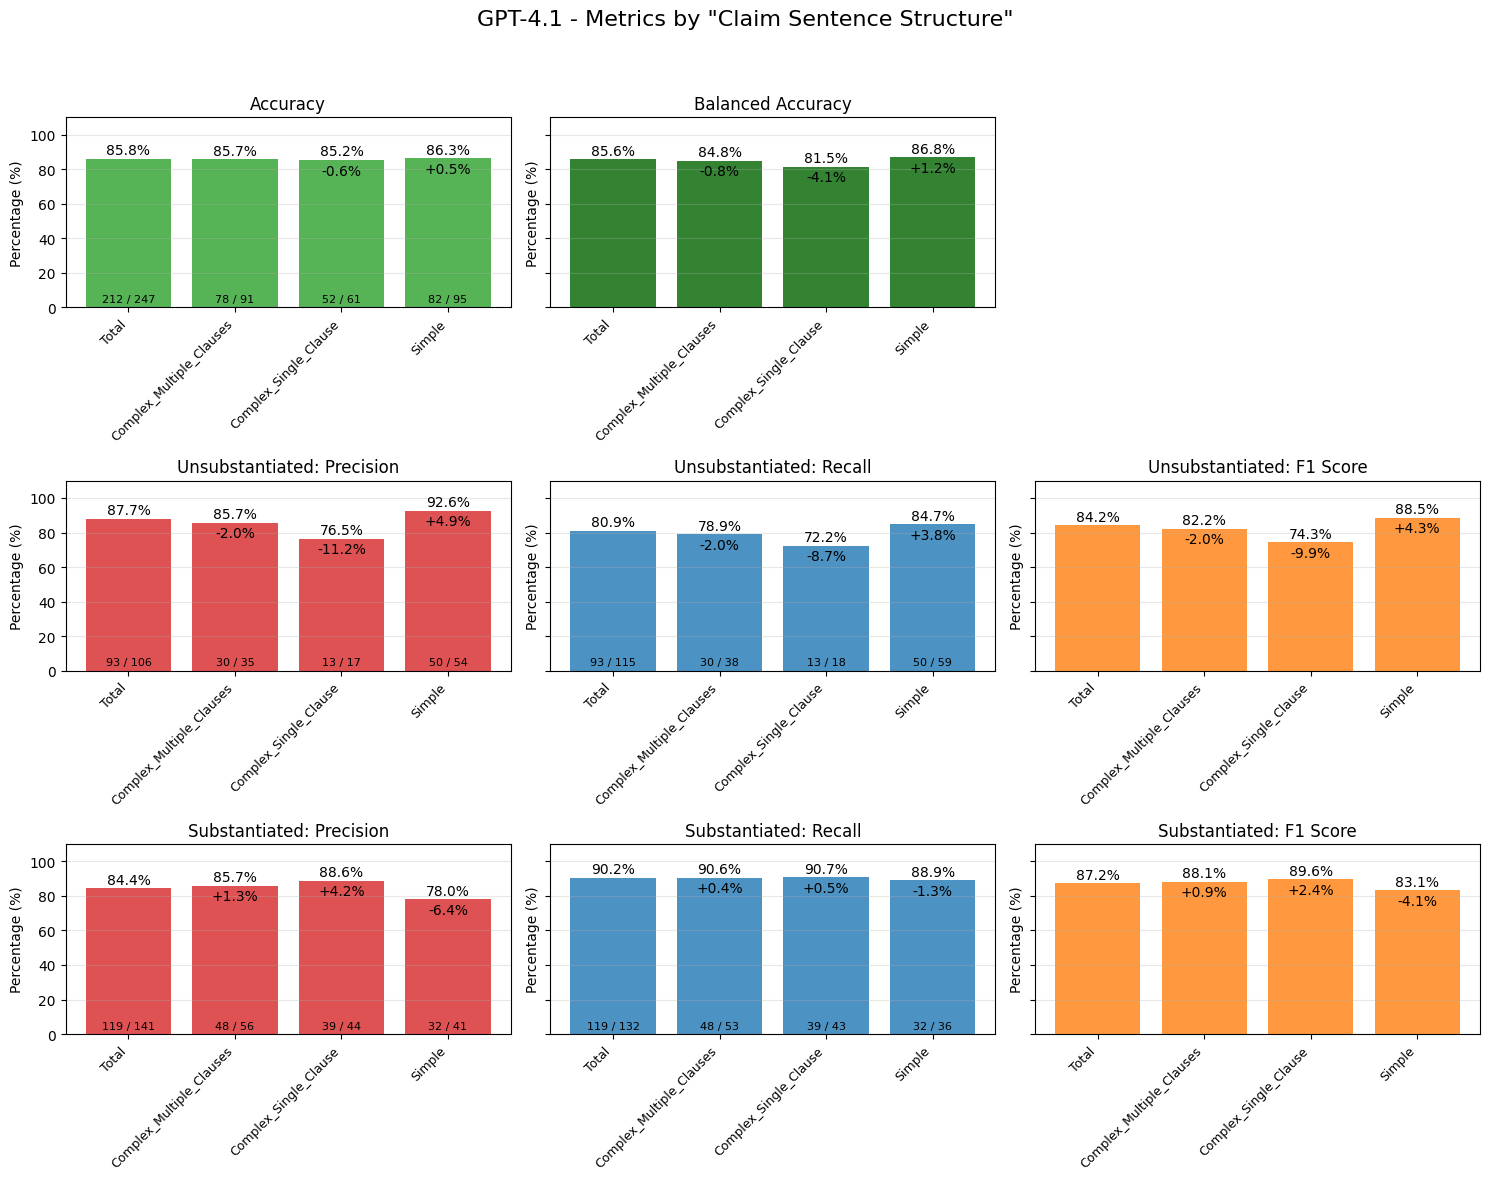

In [21]:
attribute = "Claim Sentence Structure"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [22]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Claim Sentence Structure': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Simple,1.0675,1.0000,1.6796,0.3453,0.8276,0.7500
Complex_Multiple_Clauses,0.9851,1.0000,0.8333,0.8021,1.0817,1.0000
Complex_Single_Clause,0.9389,0.8356,0.5525,0.3331,1.0969,1.0000


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.5858,0.7461,0.2808,0.8690,0.1593,0.9234


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.001000,0.8800,N/A,N/A,N/A,N/A
Accuracy,-0.000700,0.6980,N/A,N/A,N/A,N/A
Precision,N/A,N/A,0.002800,0.0900,0.003600,0.0620
Recall,N/A,N/A,-0.002600,0.8870,-0.001300,0.9440
F1 Score,N/A,N/A,0.000000,0.3570,0.000900,0.1320


### Amount Claims to Substantiate

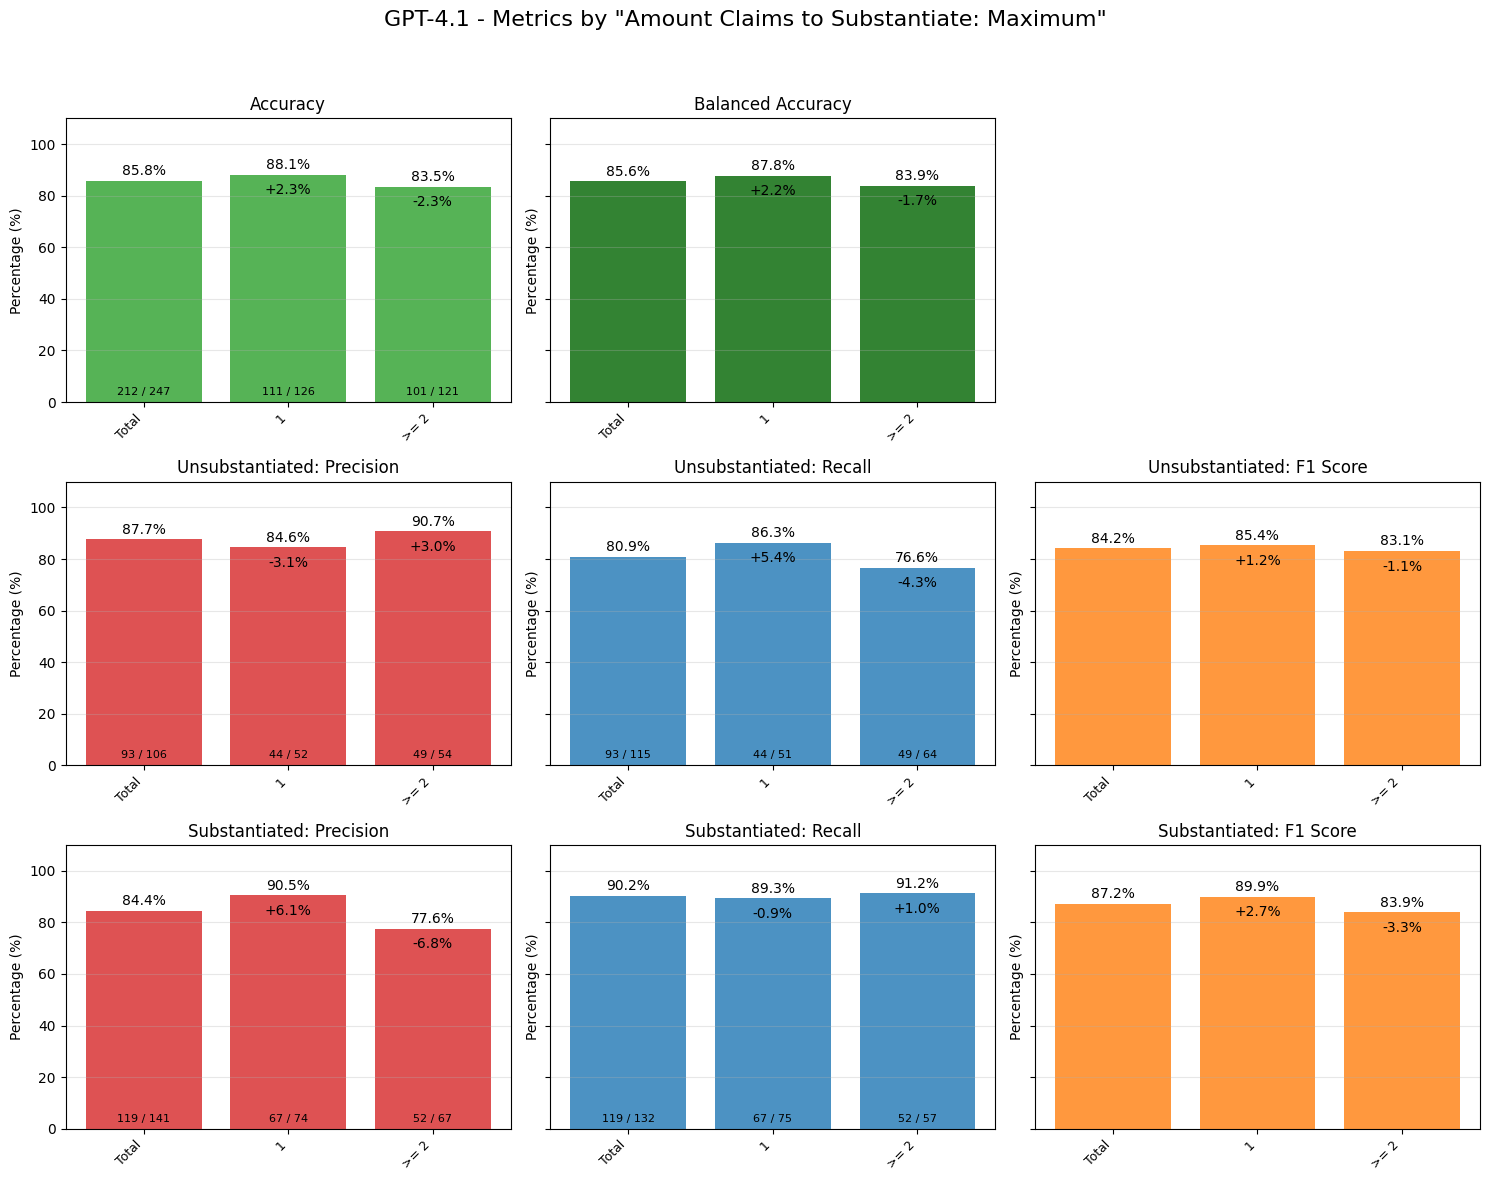

In [23]:
attribute = "Amount Claims to Substantiate: Maximum"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=2)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [24]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=2)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount Claims to Substantiate: Maximum': ## ----
Fisher's exact test results (per attribute value when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.4653,0.3623,1.9242,0.2361,0.8053,0.7764
>= 2,0.6824,0.3623,0.5197,0.2361,1.2418,0.7764


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,1.4773,0.2242,1.5705,0.2101,0.0000,1.0000


Permutation test results (comparison per metric over 1000 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,0.000300,0.2340,N/A,N/A,N/A,N/A
Accuracy,0.000400,0.1850,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.000800,0.6620,0.003300,0.0380
Recall,N/A,N/A,0.001700,0.1520,-0.000600,0.9520
F1 Score,N/A,N/A,-0.000200,0.4040,0.000800,0.1050


## Overall Evaluation of Significance Test Results

In [25]:
significance_results = extract_p_values(significance_tests_results)

In [26]:
attributes = list(significance_results.keys())
attributes

['Reference Only',
 'Claim Contains Number or Formula',
 'Amount Citations in Sentence',
 'Amount References for Claim',
 'Claim Sentence Structure',
 'Amount Claims to Substantiate: Maximum']

In [27]:
p_values_by_test = reorganize_p_values_by_test_type(significance_results)

### Bonferroni Procedure for Fisher's Exact Test Results

In [28]:
fisher_exact_results = p_values_by_test['Fisher Exact']

for label_set in fisher_exact_results:
    print(f"---- Label set: {label_set} ----")
    results_with_adjusted_p_values = apply_fisher_bonferroni_p_value_correction(label_set, fisher_exact_results)
    display_fisher_bonferroni_results_table(results_with_adjusted_p_values)

---- Label set: Total ----


,Attribute Name,Attribute Value,Original p-value,Adjusted p-value,Significant
0,Reference Only,Yes,0.3129,1.0000,No
1,Reference Only,No,0.3129,1.0000,No
2,Claim Contains Number or Formula,No,0.1337,0.8022,No
3,Claim Contains Number or Formula,Number,0.1107,0.6642,No
4,Claim Contains Number or Formula,Formula,1.0000,1.0000,No
5,Amount Citations in Sentence,1,1.0000,1.0000,No
6,Amount Citations in Sentence,>= 2,1.0000,1.0000,No
7,Amount References for Claim,1,0.1453,0.8718,No
8,Amount References for Claim,>= 2,0.1453,0.8718,No
9,Claim Sentence Structure,Simple,1.0000,1.0000,No


---- Label set: Substantiated ----


,Attribute Name,Attribute Value,Original p-value,Adjusted p-value,Significant
0,Reference Only,Yes,0.2172,1.0000,No
1,Reference Only,No,0.2172,1.0000,No
2,Claim Contains Number or Formula,No,0.0421,0.2526,No
3,Claim Contains Number or Formula,Number,0.1105,0.6630,No
4,Claim Contains Number or Formula,Formula,0.1879,1.0000,No
5,Amount Citations in Sentence,1,0.5499,1.0000,No
6,Amount Citations in Sentence,>= 2,0.5499,1.0000,No
7,Amount References for Claim,1,0.7764,1.0000,No
8,Amount References for Claim,>= 2,0.7764,1.0000,No
9,Claim Sentence Structure,Simple,0.7500,1.0000,No


---- Label set: Unsubstantiated ----


,Attribute Name,Attribute Value,Original p-value,Adjusted p-value,Significant
0,Reference Only,Yes,0.7769,1.0000,No
1,Reference Only,No,0.7769,1.0000,No
2,Claim Contains Number or Formula,No,0.7467,1.0000,No
3,Claim Contains Number or Formula,Number,0.4659,1.0000,No
4,Claim Contains Number or Formula,Formula,1.0000,1.0000,No
5,Amount Citations in Sentence,1,0.2396,1.0000,No
6,Amount Citations in Sentence,>= 2,0.2396,1.0000,No
7,Amount References for Claim,1,0.1558,0.9348,No
8,Amount References for Claim,>= 2,0.1558,0.9348,No
9,Claim Sentence Structure,Simple,0.3453,1.0000,No


### Holm Procedure for Chi-Squared and Permutation Test Results

#### Chi-Squared Test Results

In [29]:
chi_squared_results = p_values_by_test['Chi-Squared']
chi_squared_results

for label_set in chi_squared_results:
    rejected_null_hypotheses, accepted_null_hypotheses = holm_p_value_correction(chi_squared_results[label_set])
    print(f"---- Label set: {label_set} ----")
    print_holm_correction_results_as_table(rejected_null_hypotheses, accepted_null_hypotheses, p_values_by_test['Chi-Squared'], label_set)

---- Label set: Total ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.2242,1.0000,No
1,Reference Only,0.2517,1.0000,No
2,Amount Citations in Sentence,0.4694,1.0000,No
3,Amount References for Claim,0.5019,1.0000,No
4,Claim Contains Number or Formula,0.6586,1.0000,No
5,Claim Sentence Structure,0.7461,0.7461,No


---- Label set: Substantiated ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Claim Contains Number or Formula,0.0429,0.2574,No
1,Reference Only,0.4039,1.0000,No
2,Claim Sentence Structure,0.9234,1.0000,No
3,Amount Citations in Sentence,0.9574,1.0000,No
4,Amount References for Claim,0.9797,1.0000,No
5,Amount Claims to Substantiate: Maximum,1.0000,1.0000,No


---- Label set: Unsubstantiated ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.2101,1.0000,No
1,Amount References for Claim,0.3203,1.0000,No
2,Claim Contains Number or Formula,0.6555,1.0000,No
3,Claim Sentence Structure,0.8690,1.0000,No
4,Reference Only,0.8978,1.0000,No
5,Amount Citations in Sentence,1.0000,1.0000,No


#### Permutation Test Results

In [30]:
chi_squared_results = p_values_by_test['Chi-Squared']

for label_set in chi_squared_results:
    rejected_null_hypotheses, accepted_null_hypotheses = holm_p_value_correction(chi_squared_results[label_set])
    print(f"---- Label set: {label_set} ----")
    print_holm_correction_results_as_table(rejected_null_hypotheses, accepted_null_hypotheses, p_values_by_test['Chi-Squared'], label_set)

---- Label set: Total ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.2242,1.0000,No
1,Reference Only,0.2517,1.0000,No
2,Amount Citations in Sentence,0.4694,1.0000,No
3,Amount References for Claim,0.5019,1.0000,No
4,Claim Contains Number or Formula,0.6586,1.0000,No
5,Claim Sentence Structure,0.7461,0.7461,No


---- Label set: Substantiated ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Claim Contains Number or Formula,0.0429,0.2574,No
1,Reference Only,0.4039,1.0000,No
2,Claim Sentence Structure,0.9234,1.0000,No
3,Amount Citations in Sentence,0.9574,1.0000,No
4,Amount References for Claim,0.9797,1.0000,No
5,Amount Claims to Substantiate: Maximum,1.0000,1.0000,No


---- Label set: Unsubstantiated ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.2101,1.0000,No
1,Amount References for Claim,0.3203,1.0000,No
2,Claim Contains Number or Formula,0.6555,1.0000,No
3,Claim Sentence Structure,0.8690,1.0000,No
4,Reference Only,0.8978,1.0000,No
5,Amount Citations in Sentence,1.0000,1.0000,No


In [31]:
permutation_results = p_values_by_test['Permutation Test']

for label_set in permutation_results:
    for metric in permutation_results[label_set]:
        rejected_null_hypotheses, accepted_null_hypotheses = holm_p_value_correction(permutation_results[label_set][metric])
        print(f"---- Label set: {label_set}, Metric: {metric} ----")
        print_holm_correction_results_as_table(rejected_null_hypotheses, accepted_null_hypotheses, p_values_by_test['Permutation Test'][label_set], metric)

---- Label set: Total, Metric: Accuracy ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Reference Only,0.1760,1.0000,No
1,Amount Claims to Substantiate: Maximum,0.1850,0.9250,No
2,Amount Citations in Sentence,0.3460,1.0000,No
3,Amount References for Claim,0.3990,1.0000,No
4,Claim Sentence Structure,0.6980,1.0000,No
5,Claim Contains Number or Formula,0.8810,0.8810,No


---- Label set: Total, Metric: Balanced Accuracy ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.2340,1.0000,No
1,Reference Only,0.3040,1.0000,No
2,Amount References for Claim,0.4310,1.0000,No
3,Amount Citations in Sentence,0.6470,1.0000,No
4,Claim Contains Number or Formula,0.7290,1.0000,No
5,Claim Sentence Structure,0.8800,0.8800,No


---- Label set: Substantiated, Metric: Precision ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Citations in Sentence,0.0300,0.1800,No
1,Amount Claims to Substantiate: Maximum,0.0380,0.1900,No
2,Claim Sentence Structure,0.0620,0.2480,No
3,Reference Only,0.1370,0.4110,No
4,Amount References for Claim,0.1560,0.3120,No
5,Claim Contains Number or Formula,0.7950,0.7950,No


---- Label set: Substantiated, Metric: Recall ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Claim Contains Number or Formula,0.0580,0.3480,No
1,Reference Only,0.2720,1.0000,No
2,Amount References for Claim,0.7450,1.0000,No
3,Amount Citations in Sentence,0.8030,1.0000,No
4,Claim Sentence Structure,0.9440,1.0000,No
5,Amount Claims to Substantiate: Maximum,0.9520,0.9520,No


---- Label set: Substantiated, Metric: F1 Score ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Citations in Sentence,0.0560,0.3360,No
1,Reference Only,0.0790,0.3950,No
2,Amount Claims to Substantiate: Maximum,0.1050,0.4200,No
3,Claim Sentence Structure,0.1320,0.3960,No
4,Claim Contains Number or Formula,0.1360,0.2720,No
5,Amount References for Claim,0.3680,0.3680,No


---- Label set: Unsubstantiated, Metric: Precision ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Citations in Sentence,0.0030,0.0180,Yes
1,Claim Sentence Structure,0.0900,0.4500,No
2,Claim Contains Number or Formula,0.4140,1.0000,No
3,Amount References for Claim,0.6420,1.0000,No
4,Amount Claims to Substantiate: Maximum,0.6620,1.0000,No
5,Reference Only,0.7990,0.7990,No


---- Label set: Unsubstantiated, Metric: Recall ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Claims to Substantiate: Maximum,0.1520,0.9120,No
1,Amount References for Claim,0.2340,1.0000,No
2,Claim Contains Number or Formula,0.5610,1.0000,No
3,Reference Only,0.6430,1.0000,No
4,Amount Citations in Sentence,0.7620,1.0000,No
5,Claim Sentence Structure,0.8870,0.8870,No


---- Label set: Unsubstantiated, Metric: F1 Score ----


,Test Name,Original p-value,Adjusted p-value,Significant
0,Amount Citations in Sentence,0.0530,0.3180,No
1,Claim Sentence Structure,0.3570,1.0000,No
2,Amount Claims to Substantiate: Maximum,0.4040,1.0000,No
3,Amount References for Claim,0.5660,1.0000,No
4,Reference Only,0.6100,1.0000,No
5,Claim Contains Number or Formula,0.7920,0.7920,No
